# CROSS-VALIDATION IN MACHINE LEARNING
In this notebook we will describe the code required to perform a cross-validation procedure over our data.

## Pre-processing
The next cells are a repetition of what we did last weeks.
### 1.- Import libraries

In [1]:
# We would require again the following libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
import numpy as np
import pandas as pd

In [2]:
# This time we will use the predefined function to scale (min-max normalisation) our data
from sklearn.preprocessing import MinMaxScaler

In [3]:
# we will use the same library to divide our dataset in train and testing
from sklearn.model_selection import train_test_split

In [4]:
# We will import the functions to deal with a linear model.
import sklearn.linear_model as skl_lm
# and a function that calculates the performance
from sklearn.metrics import mean_squared_error

In [5]:
# We will use also another library to plot our model
import matplotlib.pyplot as plt

### 2.- Data acqusition, cleaning, and normalisation
Again, we use the same code to open another csv file, this time intended for a regression problem
The dataset represents the money invested in advertisement in TV, Radio, and Newspapers.
The last column represents the sales of the product.
A summary is as follows:

* 1.- Product ID
* 2.- TV
* 3.- Radio
* 4.- Newspapers
* 5.- Sales

In [6]:
# header: indicates if the dataset has an initial line with the name of each column
# If we visualise the dataset,we can see that the first row corresponds with the name of the columns
dataset = pd.read_csv('Advertising.csv', header=1)

In [7]:
# We can visualise the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       199 non-null    int64  
 1   230.1   199 non-null    float64
 2   37.8    199 non-null    float64
 3   69.2    199 non-null    float64
 4   22.1    199 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


We can see that, this time, the dataset doesn't have missing values

In [8]:
# sklearn provides different ways of normalising/scaling our data
# first, we need to create a scaler and then apply it to the data
# define a min-max scaler
scaler = MinMaxScaler()

In [9]:
# transform data
dataset_norm = scaler.fit_transform(dataset)

## Division of our dataset in training and testing
### Same than last week

We decide to divide our dataset into two parts: 70% for training, and 30% for testing. For that, we will use the function **train_test_split**. This function will require to divide the predictors from the target/label column. Since our dataset is stored in numpy array, we can retrieve directly this data.

The labels:

$[:, :-1]$ All rows and all columns except the last one

The predictors:

$[:, -1]$ All rows and last column

In [33]:
# we select all the colums except the last one
predictors = dataset_norm[:, :-1]
# for the target (sales), we select the last column
target = dataset_norm[:, -1]

In [34]:
# to check the results, we print the dimensions of dataset
# the dimensions of the array of the predictors, which should be the same of the dataset with one column less
# the dimensions for the targets, which should be only one column
# Note that shape doesn't show dimensions equal to 1 in the columns
print('Dataset dimension: ',dataset_norm.shape)
print('Predictors dimension: ', predictors.shape)
print('Target dimension: ', target.shape)

Dataset dimension:  (199, 5)
Predictors dimension:  (199, 4)
Target dimension:  (199,)


In [35]:
# Now that we have an array with predictors and another with the target values, we can use our train_test_split function
# test_size = 0.3 means that 30% goes to testing and the rest 70% for validation (as we wanted)
# random_state we always spit the data in the same way (setting a seed value for random number generator). 
# Necessary for comparison of more than one mdoel
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 101)

In [36]:
# we can check again the dimension of our train and test datasets
print('Predictors dimensions for training: ', X_train.shape)
print('Predictors dimensions for testing: ', X_test.shape)
print('Target dimensions for training: ', y_train.shape)
print('Target dimensions for testing: ', y_test.shape)

Predictors dimensions for training:  (139, 4)
Predictors dimensions for testing:  (60, 4)
Target dimensions for training:  (139,)
Target dimensions for testing:  (60,)


### 2.- Creation, training and assessment of a simple linear model

To properly follow the full validation process and, for simplicity, we then use a linear regression model to predict whether a person has diabetes or not (same dataset of prevous lab). We will see the theory behind this simple machine learning model soon. Only to mention that this model tries to fit a line to our data using a one degree polynomial.
![LinearModel](img/Regression.png)


For simplicity, we will use only as predictors, the information regarding *TV advertisements*, (column 1), and the class variable (column 5).

In [37]:
# To be able to visualise the model in a 2-dimensional plot, 
# we select predictor 1 (Money spent in TV ads) as a single feature of the model for training and testing. 
# For that, we need to reshape them to have only one column
X_train_1 = X_train[:,1].reshape(-1,1)
X_test_1 = X_test[:,1].reshape(-1,1)

In **reshape(-1,1)**, we give **-1** value to the number of rows and **1** to the number of columns. The number of columns is easy to understand, we only want to have one feature for our model and this feature is stored in column 1 of the dataset. However, why **row=-1**?, with **-1**, we indicate Python that we don't know the number of columns and it should be the compiler the one that has to figure out this value. Note that we can only do that with only one of the dimensions of the matrix. This is wrong **reshape(-1,-1)**.

In [38]:
# Create a linear regression object. This is an empty and generic model
lm = skl_lm.LinearRegression()

In [39]:
# We need to train the model using our training sets
model = lm.fit(X_train_1, y_train)

We now use the **predict()** function from sklearn to estimate the performance achieved by the linear model using the testing set.

In [40]:
# Make predictions using the testing set
pred = model.predict(X_test_1)

In [41]:
# The MSE is calculated using the test dataset and the model
# Our mean square error is
MSE = mean_squared_error(y_test, pred)
print('MSE:', MSE)

MSE: 0.015485860634487114


### 3.- Visualisation

First, we are going to show the coefficient *m* in the regression model and the intercept *b*.
Remember that follows the following formula:

$ y=mx + b$

In [42]:
print('Coefficient m: ', lm.coef_)
print('Intercept b: ', lm.intercept_)

Coefficient m:  [0.5628171]
Intercept b:  0.22347160919160947


Now we are going to plot the data and the linear model. For the data, we are going to use a scatter plot and a normal plot for the regression model.

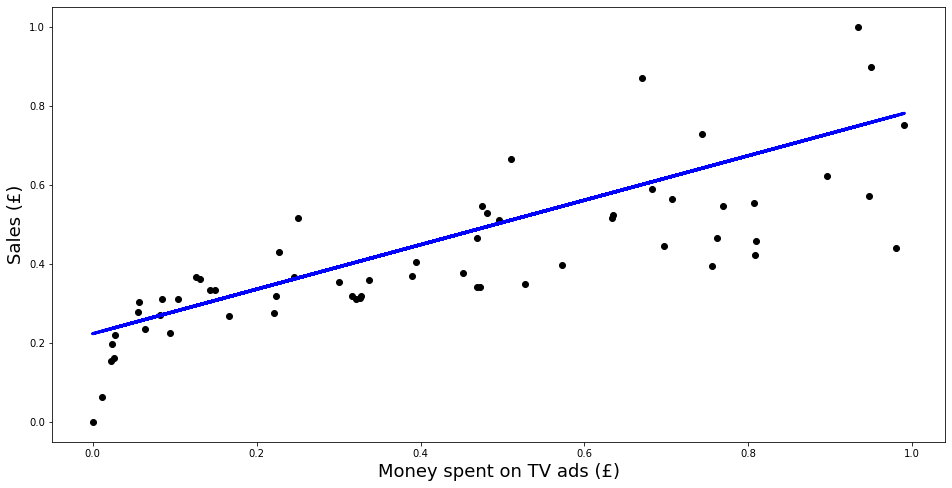

In [43]:
# Plot outputs
plt.figure(figsize=(16, 8))
plt.scatter(X_test_1, y_test,  color='black')
plt.plot(X_test_1, pred, color='blue', linewidth=3)

plt.xlabel("Money spent on TV ads (£)",fontsize=18)
plt.ylabel("Sales (£)",fontsize=18)

plt.show()

We can see here that the linear model does an OK job for most of the data, but it is not able to fit the data when the money spent in TV adverts is low.

## Square and Cubic models
Now, we are going to create a quadratic an a cubic model using the same single feature and later estimate the test errors.

Quadratic ->
$ y=mx^2 + b$

Cubic ->
$ y=mx^3 + b$

The implementation of polynomial regression in Python is a two-step process. First, we transform our data into a polynomial using the **PolynomialFeatures()** function from sklearn and then use linear regression to fit the parameters:

![two-step](img/pipeline.png)

In [149]:
# To use higher levels of polynomial in our linear regression model, we should use the following function
# Importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

In [150]:
# Creation of the Quadratic model (degree 2)
poly = PolynomialFeatures(degree=2)

In [151]:
# Fitting the quadratic model into the linear regression
X_train_2 = poly.fit_transform(X_train_1)
X_test_2 = poly.fit_transform(X_test_1)

In [152]:
# Fitting the linear model
model = lm.fit(X_train_2, y_train)
pred_2 = model.predict(X_test_2)
print(mean_squared_error(y_test, pred_2))

0.015480236270248582


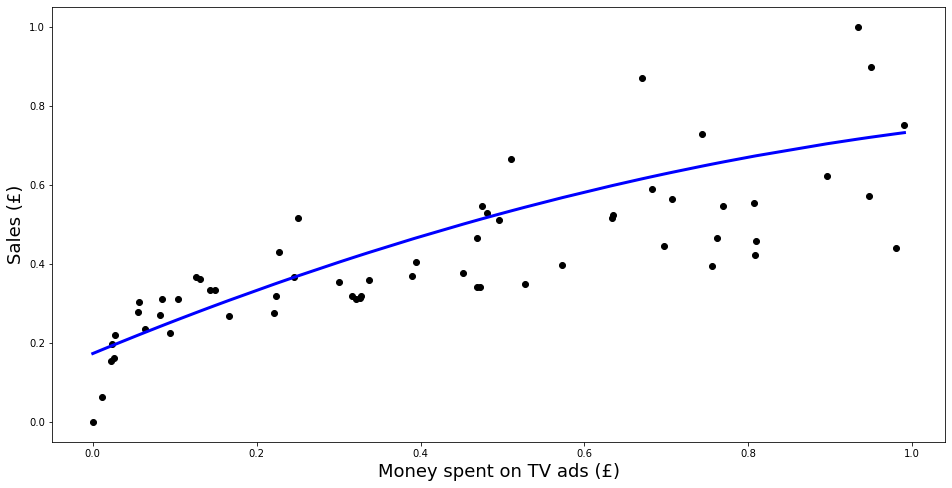

In [159]:
# Plot outputs
plt.figure(figsize=(16, 8))
plt.scatter(X_test_1, y_test,  color='black')
# The values in X_test_1 are not in order. We need to sort them before plotting
xs, ys = zip(*sorted(zip(X_test_1, pred_2)))
plt.plot(xs, ys, color='blue', linewidth=3)

plt.xlabel("Money spent on TV ads (£)",fontsize=18)
plt.ylabel("Sales (£)",fontsize=18)

plt.show()

In [156]:
# We do the same with the cubic version
poly = PolynomialFeatures(degree=3)
X_train_3 = poly.fit_transform(X_train_1)
X_test_3 = poly.fit_transform(X_test_1)

model = lm.fit(X_train_3, y_train)
pred_3 = model.predict(X_test_3)

0.015434689658162805


In [ ]:
# We print the error
print(mean_squared_error(y_test, pred_3))

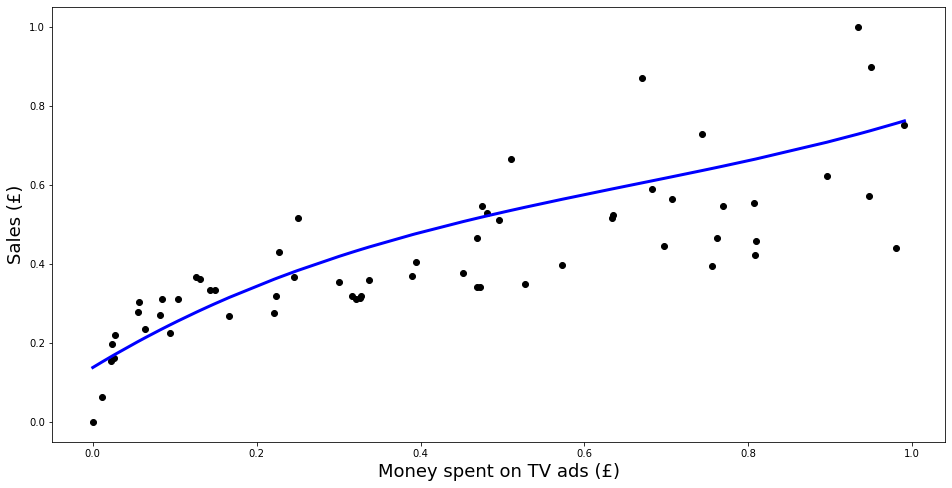

In [161]:
# Plot outputs
plt.figure(figsize=(16, 8))
plt.scatter(X_test_1, y_test,  color='black')
# The values in X_test_1 are not in order. We need to sort them before plotting
xs, ys = zip(*sorted(zip(X_test_1, pred_3)))
plt.plot(xs, ys, color='blue', linewidth=3)

plt.xlabel("Money spent on TV ads (£)",fontsize=18)
plt.ylabel("Sales (£)",fontsize=18)

plt.show()

These error rates are 0.01548 and 0.01543, respectively. If we choose a different training set instead, then we will obtain somewhat different errors on the validation set. We can test this out by setting a different random seed:

In [163]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 101)
X_train_1 = X_train[:,1].reshape(-1,1)
X_test_1 = X_test[:,1].reshape(-1,1)

# Linear
model = lm.fit(X_train_1, y_train)
print(mean_squared_error(y_test, model.predict(X_test_1)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train_2 = poly.fit_transform(X_train_1)
X_test_2 = poly.fit_transform(X_test_1)

model = lm.fit(X_train_2, y_train)
print(mean_squared_error(y_test, model.predict(X_test_2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train_3 = poly.fit_transform(X_train_1)
X_test_3 = poly.fit_transform(X_test_1)

model = lm.fit(X_train_3, y_train)
print(mean_squared_error(y_test, model.predict(X_test_3)))

0.015485860634487114
0.015480236270248582
0.015434689658162805


We can see here that values change with different splits

## Leave-One-Out Cross-Validation
The LOO-CV estimate can be automatically computed for any generalised linear model using the **LeaveOneOut()** and **cross_val_score()** functions.

In [164]:
# We are going to import a couple of new libraries
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
# This library will be used for the k-Fold cross validation
from sklearn.model_selection import KFold

We need to use our original dataset again, but with only one predictor for visualisation purposes
we select predictor 1  (TV ads) to define the model for training and testing. 
For that, we need to reshape them to have only one column

In [165]:
X_predictors = predictors[:,1].reshape(-1,1)
y_target = target.reshape(-1,1)

In [166]:
# Now we check dimensions
print('Predictors dimension: ', X_predictors.shape)
print('Target dimension: ', y_target.shape)

Predictors dimension:  (199, 1)
Target dimension:  (199, 1)


**LeaveOneOut()** provides train/test indices to split data in train test sets. Each sample is used once as a test set, while the remaining samples form the training set. Remember that due to the high number of test sets (which is the same as the number of samples) this cross validation method can be very costly.
![LOO-CV](img/loocv1.png)

In [167]:
# create loocv procedure
loo = LeaveOneOut()

In [168]:
# calculate the number of splits
n_splits = loo.get_n_splits(X_predictors)

In [169]:
# Now, we are going to ckeck if the number of splits is equal to the number of samples in our training set
print('Number of samples in our training set: ', X_predictors.shape[0])
print('Number of splits: ', n_splits)

Number of samples in our training set:  199
Number of splits:  199


Now we use **cross_val_score()** to calculate the 199 scores/performances generated by fitting 199 times the model to the different sets of data

In [170]:
scores = cross_val_score(lm, X_predictors, y_target, scoring="neg_mean_squared_error", cv=loo)

In [171]:
# We check the dimensions of our score vector
print(scores.shape)

(199,)


In [172]:
# For the performance, we report the mean and the standard deviation generated by the 199 performances
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 199, MSE: 0.016598358567171487, STD: 0.022266940530808865


We can repeat this procedure for increasingly complex polynomial fits.
To automate the process, we use the `for()` function to initiate a for loop
which iteratively fits polynomial regressions for polynomials of order `i = 1`
to `i = 5` and computes the associated cross-validation error. 

This command may take a couple of minutes to run.

In [183]:
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(predictors)
    model = lm.fit(X_current, target)
    scores = cross_val_score(model, X_current, target, scoring="neg_mean_squared_error", cv=loo)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 0.004616325321530807, STD: 0.010817750662548548
Degree-2 polynomial MSE: 0.0006880227070699672, STD: 0.00310958529173024
Degree-3 polynomial MSE: 0.0015738627498580538, STD: 0.004374694879505924
Degree-4 polynomial MSE: 0.0035991005377766705, STD: 0.02627398952443594
Degree-5 polynomial MSE: 0.01466487384018838, STD: 0.1134544446713741


Here we see a sharp drop in the estimated test MSE between the linear and quadratic fits, but then no clear improvement from using higher-order polynomials.

## k-Fold Cross-Validation

The **KFold** function will be used to implement `k`-fold CV. Below we use `k = 10`, a common choice for `k` on the same dataset. 

In [180]:
# this time we create a k-fold cross-validation procedure
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

In [181]:
# same procedure but using our cross-validation procedure
scores = cross_val_score(lm, X_predictors, y_target, scoring="neg_mean_squared_error", cv=crossvalidation)

In [182]:
# For the performance, again we report the mean and the standard deviation generated by the 199 performances
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 10, MSE: 0.01666163430640601, STD: 0.0047133709196852495


In [184]:
for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(predictors)
    model = lm.fit(X_current, target)
    scores = cross_val_score(model, X_current, target, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 0.004858444029913402, STD: 0.0028426793908926298
Degree-2 polynomial MSE: 0.0007184601015408252, STD: 0.0006773232856457683
Degree-3 polynomial MSE: 0.0023940037417987756, STD: 0.00265307120622141
Degree-4 polynomial MSE: 0.0051888167447281955, STD: 0.006486758662750657
Degree-5 polynomial MSE: 0.05320624530810718, STD: 0.10451428171518717
Degree-6 polynomial MSE: 2.7624491650450227, STD: 6.862968280643708
Degree-7 polynomial MSE: 3.65398524040843, STD: 9.612681543521452
Degree-8 polynomial MSE: 3.8740915619656633, STD: 9.975768245452747
Degree-9 polynomial MSE: 3.5952737872674687, STD: 8.690125739713125
Degree-10 polynomial MSE: 3.108514019865827, STD: 6.704561326924152


We still see little evidence that using cubic or higher-order polynomial terms leads to lower test error than simply using a quadratic fit.